In [13]:
import zipfile
path = zipfile.ZipFile("/content/mask.v1i.yolov11 (1).zip")

In [14]:
path.extractall()

In [15]:
!pip install ultralytics

In [16]:
from ultralytics import YOLO

In [19]:
pre_train = YOLO("yolo11n.pt")

In [21]:
pre_train.train(data = "/content/data.yaml", epochs = 25)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f12517a1a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [22]:
pre_train.save("best.pt")

In [23]:
model_save = YOLO("/content/best.pt")

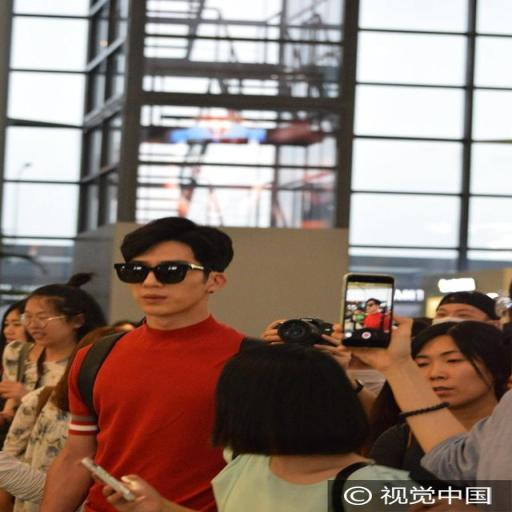

In [29]:
from IPython.display import Image
Image("/content/test/images/nqn000p326n081sq0np_jpg.rf.f4b84d24073695efa92e370323b642f3.jpg")

In [30]:
pred = model_save.predict("/content/test/images/TELEMMGLPICT000222274435_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQfyf2A9a6I9YchsjMeADBa08_jpeg.rf.1d1a0bdf3f8dc22bdcb2838809d60f20.jpg")


image 1/1 /content/test/images/TELEMMGLPICT000222274435_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQfyf2A9a6I9YchsjMeADBa08_jpeg.rf.1d1a0bdf3f8dc22bdcb2838809d60f20.jpg: 640x640 6 masks, 4 no_masks, 10.2ms
Speed: 5.3ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


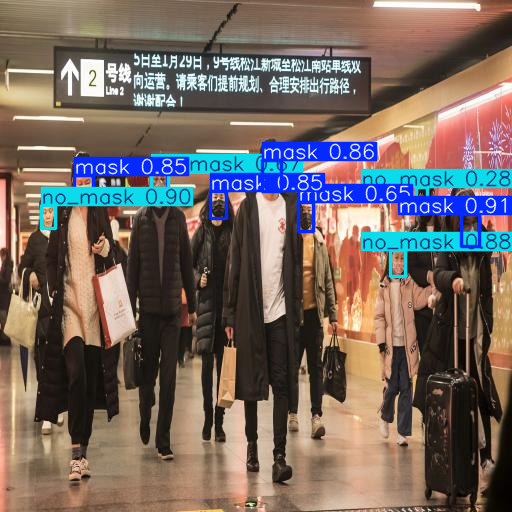

In [31]:
pred [0].show()

In [32]:
pred = model_save.predict("/content/test/images/nz_srilanka_280120_jpg.rf.b56d4fd7b783aa8fedb26686c6fcccea.jpg")


image 1/1 /content/test/images/nz_srilanka_280120_jpg.rf.b56d4fd7b783aa8fedb26686c6fcccea.jpg: 640x640 4 masks, 1 no_mask, 8.7ms
Speed: 4.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


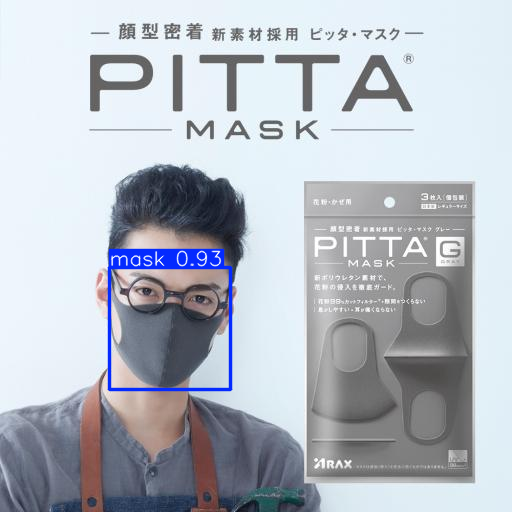

In [35]:
pred [0].show()

In [41]:
pred = model_save.predict("/content/test/images/nqn000p326o7525q707_jpg.rf.d9e3e8ee18a30db592058a358231305b.jpg")


image 1/1 /content/test/images/nqn000p326o7525q707_jpg.rf.d9e3e8ee18a30db592058a358231305b.jpg: 640x640 2 no_masks, 8.6ms
Speed: 4.0ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


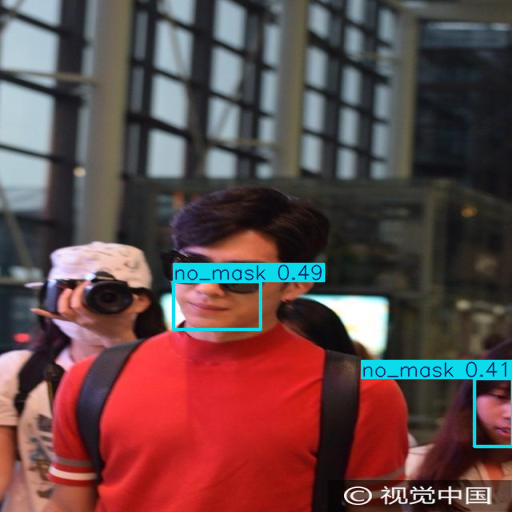

In [42]:
pred [0].show()

In [45]:
pred = model_save.predict("/content/test/images/unnamed_jpg.rf.a09879f59f8c965bfb8289b81a11c5aa.jpg")


image 1/1 /content/test/images/unnamed_jpg.rf.a09879f59f8c965bfb8289b81a11c5aa.jpg: 640x640 13 masks, 2 no_masks, 46.3ms
Speed: 15.1ms preprocess, 46.3ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


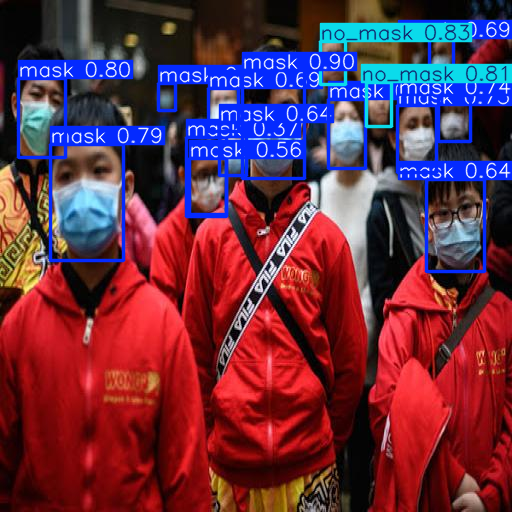

In [46]:
pred [0].show()

In [47]:
!pip install gradio

In [48]:
from PIL import Image
import gradio as gr
import numpy as np

In [49]:
def predict_image(img):
  results = model_save.predict(img)
  return results[0].plot()

In [50]:
iface = gr.Interface(fn=predict_image, inputs="image", outputs="image")
iface.launch(show_error=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8243b64902578e74e5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [51]:
from IPython.display import Video
Video("/content/video_preview_h264.mp4")

In [52]:
model_save.predict("/content/video_preview_h264.mp4", save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/274) /content/video_preview_h264.mp4: 384x640 1 mask, 51.6ms
video 1/1 (frame 2/274) /content/video_preview_h264.mp4: 384x640 1 mask, 8.0ms
video 1/1 (frame 3/274) /content/video_preview_h264.mp4: 384x640 1 mask, 9.0ms
video 1/1 (frame 4/274) /content/video_preview_h264.mp4: 384x640 1 mask, 20.9ms
video 1/1 (frame 5/274) /content/video_preview_h264.mp4: 384x640 1 mask, 20.2ms
video 1/1 (frame 6/274) /content/video_preview_h264.mp4: 384

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'mask', 1: 'no_mask'}
 obb: None
 orig_img: array([[[ 51, 129,  92],
         [ 51, 129,  92],
         [ 51, 129,  92],
         ...,
         [ 61, 141, 119],
         [ 61, 141, 119],
         [ 61, 141, 119]],
 
        [[ 51, 129,  92],
         [ 51, 129,  92],
         [ 51, 129,  92],
         ...,
         [ 61, 141, 119],
         [ 61, 141, 119],
         [ 61, 141, 119]],
 
        [[ 51, 129,  92],
         [ 51, 129,  92],
         [ 51, 129,  92],
         ...,
         [ 61, 141, 119],
         [ 61, 141, 119],
         [ 61, 141, 119]],
 
        ...,
 
        [[ 23,  42,  28],
         [ 21,  40,  26],
         [ 24,  43,  29],
         ...,
         [ 99, 113, 105],
         [107, 121, 113],
         [101, 115, 107]],
 
        [[ 23,  42,  26],
         [ 21,  40,  24],
         [ 24,  43,  29],
         ...,
      